# 機械学習基礎2B

## 20966027 田中大揮


### データの読み込み

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
%matplotlib inline

In [3]:
train_x = []
train_y = []

with open("./train_data.dat") as f:
    for line in f.readlines():
        line = re.split('\s', line)
        x, y = filter(lambda s: s != "", line)
        train_x.append(float(x))
        train_y.append(float(y))
        
train_x = np.array(train_x)
train_y = np.array(train_y)

In [4]:
test_x = []

with open("./test_data.dat") as f:
    for line in f.readlines():
        test_x.append(float(line))
        
test_x = np.array(test_x)

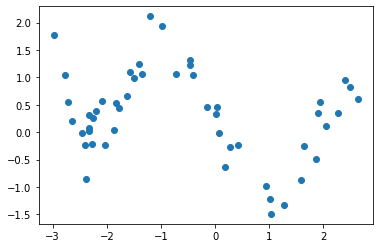

In [5]:
plt.scatter(train_x, train_y)
plt.show()

### モデルの定義

以下のような線形モデル $f$ を定義した

$$f_\theta (x) = \sum_{j=1}^5 \theta_j \phi_j (x) = \theta^T \phi(x)$$
$$\theta = (\theta_1, \cdots, \theta_5)^T$$
$$\phi(x) = (\phi_1(x), \phi_5(x))^T$$
$$\phi_j(x) = x^{j - 1}$$

In [6]:
gen_poly_func = lambda b : lambda x: np.array([x**i for i in range(b)]).T
basis_funcs = lambda x: gen_poly_func(5)(x)
phi_x = np.vectorize(basis_funcs, signature='(n)->(n,m)')
phi = phi_x(train_x) 
print(phi.shape)

(50, 5)


学習サンプルに対する2乗誤差を目的関数とし，
これを最小化するような $\hat{\theta}$を求めると

$$\hat{\theta} = \Phi^{+} y$$
$$\Phi = \left ( \begin{array}{ccc}
    \phi_1(x_1) & \cdots & \phi_5(x_1) \\
    \vdots & \ddots & \\
    \phi_1(x_n) & & \phi_5(x_n)
\end{array} \right )
$$

In [7]:
phi_dagger = np.linalg.inv(phi.T @ phi) @ phi.T
print(phi_dagger.shape, train_y.shape)
theta_hat = phi_dagger @ train_y

(5, 50) (50,)


$$y = f_{\hat{\theta}}(x^{(test)})$$
としてテストデータに対する出力を計算する

In [8]:
print(theta_hat.shape)  # b × 1
print(phi_x(test_x).shape)  # n × b

test_y = np.einsum('b,nb->n', theta_hat, phi_x(test_x))

(5,)
(50, 5)


### 学習結果の表示

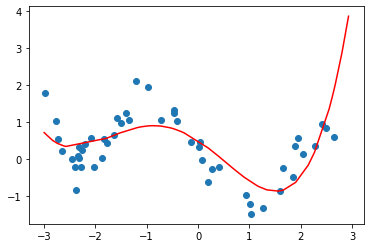

In [9]:
test_data = np.array([test_x, test_y]).T
test_data = test_data[np.argsort(test_data[:, 0])]
plt.scatter(train_x, train_y)
plt.plot(test_data[:, 0], test_data[:, 1], c='red')
plt.show()

In [10]:
# !jupyter-nbconvert --to html main.ipynb